In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [124]:
moons = make_moons(n_samples=200, noise=0.2, random_state=0)
X = moons[0]
y = moons[1]

In [125]:
from matplotlib.colors import ListedColormap

In [126]:
def plot_decison_boundary(model, X, y, margin=0.3):
    _x1 = np.linspace(X[:, 0].min()-margin, X[:, 0].max()+margin, 100)
    _x2 = np.linspace(X[:, 1].min()-margin, X[:, 1].max()+margin, 100)
    x1, x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape((x1.shape))
    custom_map = ListedColormap(['mediumblue', 'orangered'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_map)

In [127]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bo', ms=15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^', ms=15)
    plt.xlabel('$x_0$', fontsize=30)
    plt.ylabel('$x_1$', fontsize=30, rotation=0)

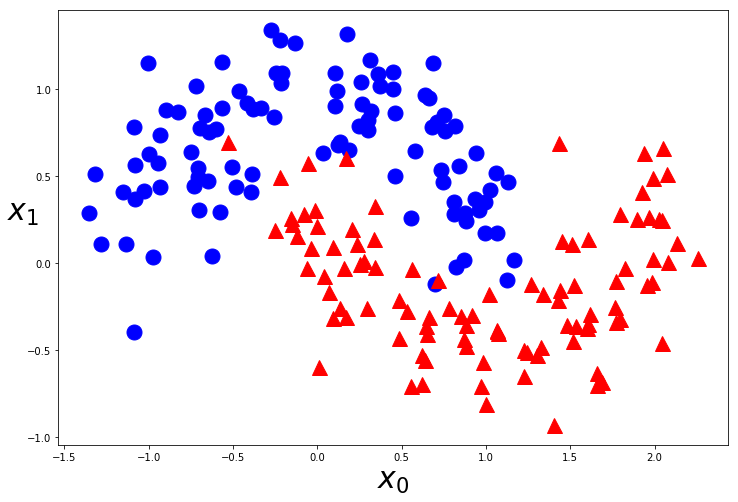

In [128]:
plt.figure(figsize=(12, 8))
plot_dataset(X, y)
plt.show()

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [131]:
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)

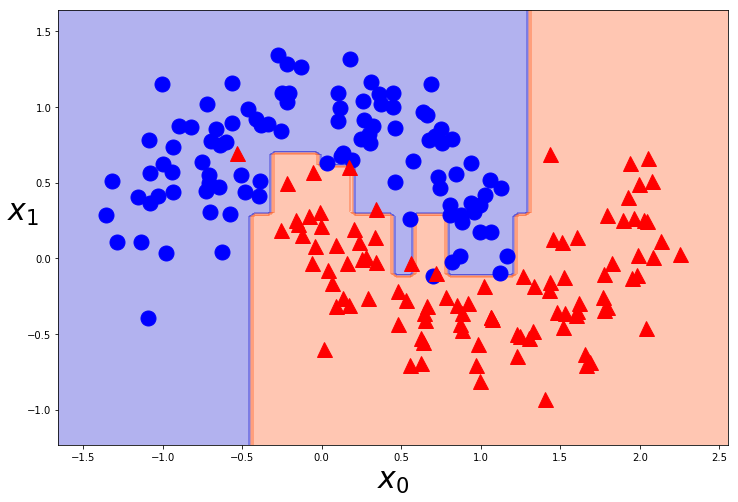

In [132]:
plt.figure(figsize=(12, 8))
plot_decison_boundary(tree_clf, X, y)
plot_dataset(X, y)
plt.show()

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

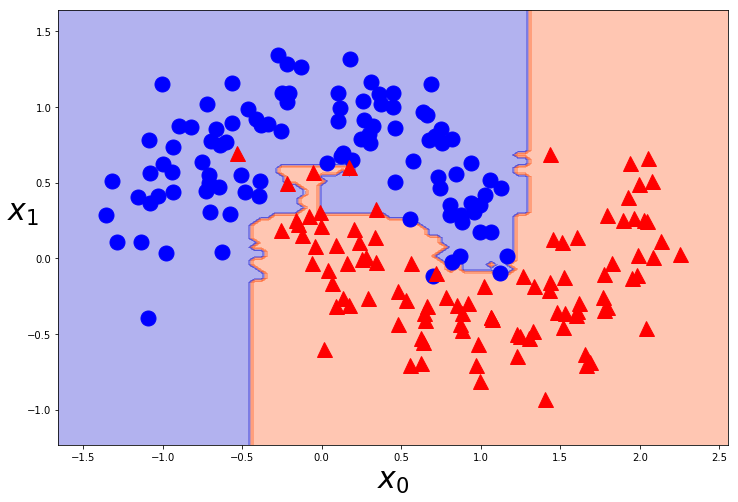

In [135]:
plt.figure(figsize=(12, 8))
plot_decison_boundary(random_forest, X, y)
plot_dataset(X, y)
plt.show()

In [136]:
from sklearn.datasets import load_iris

In [137]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [138]:
random_forest_iris = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_iris, y_iris)

In [139]:
random_forest_iris.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

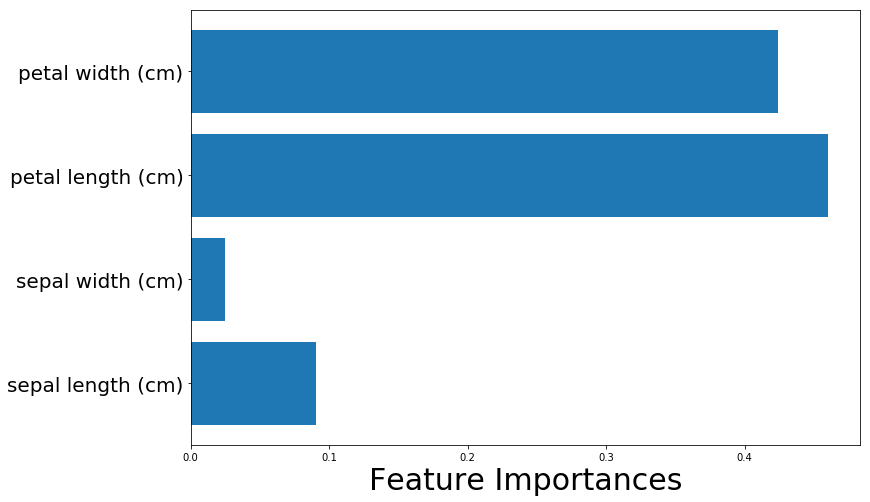

In [140]:
plt.figure(figsize=(12, 8))
plt.barh(range(iris.data.shape[1]), random_forest_iris.feature_importances_)
plt.yticks(range(iris.data.shape[1]), iris.feature_names, fontsize=20)
plt.xlabel('Feature Importances', fontsize=30)
plt.show()

### kaggleのtitanicデータを利用
https://www.kaggle.com/c/titanic

In [141]:
import pandas as pd

In [142]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [144]:
# 欠損値をAgeの平均で設定
df['Age'] = df['Age'].fillna(df['Age'].mean())
# 欠損値をEmbarkedの一番多いもので埋める
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### SexとEmbarkedを数値に変換

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
cat_features = ['Sex', 'Embarked']

In [148]:
for col in cat_features:
    lbl = LabelEncoder()
    df[col] = lbl.fit_transform(list(df[col].values))

In [149]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [150]:
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

In [151]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [153]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.score(X_test, y_test)

0.7533632286995515

In [154]:
rnd_forest = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0).fit(X_train, y_train)
rnd_forest.score(X_test, y_test)

0.8295964125560538

In [155]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [156]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [157]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [158]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [159]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [160]:
for col in cat_features:
    lbl = LabelEncoder()
    test_df[col] = lbl.fit_transform(list(test_df[col].values))

In [161]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [162]:
X_pred = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
ID = test_df['PassengerId']

In [163]:
X_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [164]:
ID.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [165]:
prediction = rnd_forest.predict(X_pred)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [166]:
submission = pd.DataFrame({
    'PassengerId': ID,
    'Survived': prediction
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [167]:
# index=False -> 通し番号を除く
submission.to_csv('submission.csv', index=False)